In [1]:
import numpy as np
import pandas as pd

In [6]:
link = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
data = pd.read_fwf(link, parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [3]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [9]:
data.columns = ['YY-MM-DD', 'value']
data.index = data['YY-MM-DD']
data = data.drop('YY-MM-DD', 1)

In [10]:
data.head()

,value
YY-MM-DD,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [11]:
#What do you notice about the range of dates?
data['1950':'1952'] 

,value
YY-MM-DD,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [12]:
# What is the empirical range of dates?
# All of the dates are month starting dates

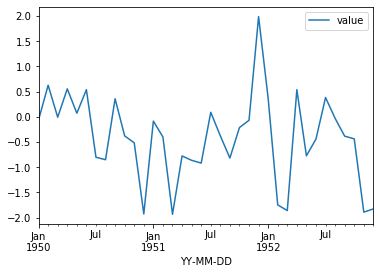

In [14]:
# How to visualize?
data['1950':'1952'].plot()

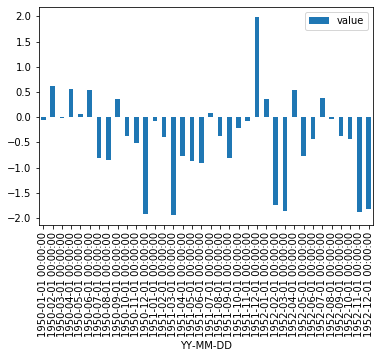

In [17]:
data['1950':'1952'].plot(kind='bar')

In [18]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
data['1951-11-11':'1951-11-12']

,value
YY-MM-DD,


In [25]:
data['1951-11-11':'1952-01-12']

,value
YY-MM-DD,
1951-12-01,1.98720
1952-01-01,0.36825


In [22]:
# What if we want a period index?
data_pd = data.to_period()

In [23]:
data['1951-11-11':'1951-11-12']

,value
YY-MM-DD,


In [24]:
data_pd['1951-11-11':'1952-01-12']

,value
YY-MM-DD,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [26]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
2.35 s ± 986 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, no date parser
1.71 s ± 91.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = True, date parser provided
1.81 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, date parser provided
1.7 s ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
# if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [28]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [29]:
df.head()

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [30]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

* truncate

In [31]:
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [32]:
ts

2015-07-31    0
2015-08-31    1
2015-09-30    2
2015-10-31    3
2015-11-30    4
2015-12-31    5
2016-01-31    6
2016-02-29    7
2016-03-31    8
2016-04-30    9
Freq: M, dtype: int64

In [33]:
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [35]:
ts.iloc[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')